In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.metrics import mean_absolute_error, mean_squared_error,\
    confusion_matrix, plot_confusion_matrix, classification_report,\
    accuracy_score, plot_roc_curve

from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, LabelEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn import set_config

In [2]:
df = pd.read_csv('Output_Data\data_subset_engineered_for_model.csv')
df.head()

,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,...,pt_d_hour,age_outstanding,device_size_cat,residence_cat,series_dev_outstanding,age_out_dev_big,age_out_dev_norm,great_big_dev,great_nom_dev,ad_click_list_v001_len
0,0,122942,8,2,41,135,5,16,5,20,...,2,2,3,3,2,0,0,0,0,5
1,0,120972,7,2,41,412,2,21,4,12,...,5,2,1,3,2,0,0,0,0,5
2,0,176028,7,2,45,435,2,16,5,19,...,10,2,1,3,2,0,0,0,0,5
3,0,166112,3,2,20,328,5,32,6,29,...,8,1,3,3,2,1,0,0,0,5
4,0,123102,7,2,24,431,5,30,3,35,...,10,2,1,3,2,0,0,0,0,5


# 2nd model

In [12]:
X = df.drop(columns='label')
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2333)
X_train.shape, X_test.shape

((80000, 34), (20000, 34))

In [4]:
tree_clf_raw = DecisionTreeClassifier(criterion = 'gini', random_state=2333)
tree_clf_raw.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2333)

In [5]:
tree_clf_raw.get_depth()

35

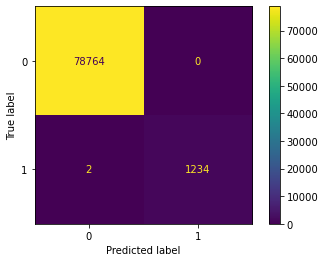

In [8]:
plot_confusion_matrix(tree_clf_raw,X_train, y_train)

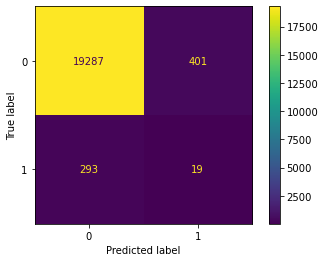

In [6]:
plot_confusion_matrix(tree_clf_raw,X_test, y_test)

In [7]:
print(classification_report(y_test, tree_clf_raw.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19688
           1       0.05      0.06      0.05       312

    accuracy                           0.97     20000
   macro avg       0.52      0.52      0.52     20000
weighted avg       0.97      0.97      0.97     20000



In [9]:
logreg_baseline_pipe = Pipeline([
    ('OHE', OneHotEncoder(sparse = False, drop = 'first')), 
    ('model', LogisticRegression(random_state=2333))
    ])

logreg_baseline_pipe

Pipeline(steps=[('OHE', OneHotEncoder(drop='first', sparse=False)),
                ('model', LogisticRegression(random_state=2333))])

In [11]:
logreg_baseline_pipe.fit(X_train, y_train)

MemoryError: Unable to allocate 25.7 GiB for an array with shape (80000, 43037) and data type float64